# Clustering
- Hierarchical Clustering
- k-means (centroid) Clustering
- DBSCAN

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving updated_train_data.csv to updated_train_data.csv
User uploaded file "updated_train_data.csv" with length 295654 bytes


## Janatahack: Customer Segmentation
- https://datahack.analyticsvidhya.com/contest/janatahack-customer-segmentation/#ProblemStatement

In [2]:
import pandas as pd

# Load the dataset
file_path = 'updated_train_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,ID,Gender,Ever_Married,Age,College,Work_Experience,Spending_Score,Family_Size,Cluster
0,462809,0,0.0,22,0.0,1.0,-1,4.0,Cat_4
1,462643,1,1.0,38,1.0,1.0,0,3.0,Cat_4
2,466315,1,1.0,67,1.0,1.0,-1,1.0,Cat_6
3,461735,0,1.0,67,1.0,0.0,1,2.0,Cat_6
4,462669,1,1.0,40,1.0,1.0,1,6.0,Cat_6


In [3]:
data.describe()

,ID,Gender,Ever_Married,Age,College,Work_Experience,Spending_Score,Family_Size
count,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000
mean,463479.214551,0.452529,0.592836,43.466906,0.625434,2.472980,-0.453892,2.856346
std,2595.381232,0.497772,0.491336,16.711696,0.484041,3.265248,0.741202,1.499577
min,458982.000000,0.000000,0.000000,18.000000,0.000000,0.000000,-1.000000,1.000000
25%,461240.750000,0.000000,0.000000,30.000000,0.000000,0.000000,-1.000000,2.000000
50%,463472.500000,0.000000,1.000000,40.000000,1.000000,1.000000,-1.000000,3.000000
75%,465744.250000,1.000000,1.000000,53.000000,1.000000,4.000000,0.000000,4.000000
max,467974.000000,1.000000,1.000000,89.000000,1.000000,14.000000,1.000000,9.000000


In [6]:
data.Cluster.value_counts()

Cat_6    5314
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Cluster, dtype: int64

# Hierarchical Clustering

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Exclude 'ID' and 'Cluster' columns
features = data.drop(columns=['ID', 'Cluster'])

# Standardize the features
# scaler = StandardScaler()
scaler = MinMaxScaler()

scaled_features = scaler.fit_transform(features)


In [ ]:

# Perform hierarchical clustering using different linkage methods
linkage_methods = ['complete', 'single']
dendrograms = {}

for method in linkage_methods:
    linked = linkage(scaled_features, method=method)
    dendrograms[method] = linked

# Plotting the dendrograms for different linkage methods
plt.figure(figsize=(15, 10))

for i, method in enumerate(linkage_methods, 1):
    plt.subplot(2, 2, i)
    dendrogram(dendrograms[method])
    plt.title(f'Linkage Method: {method.capitalize()}')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()


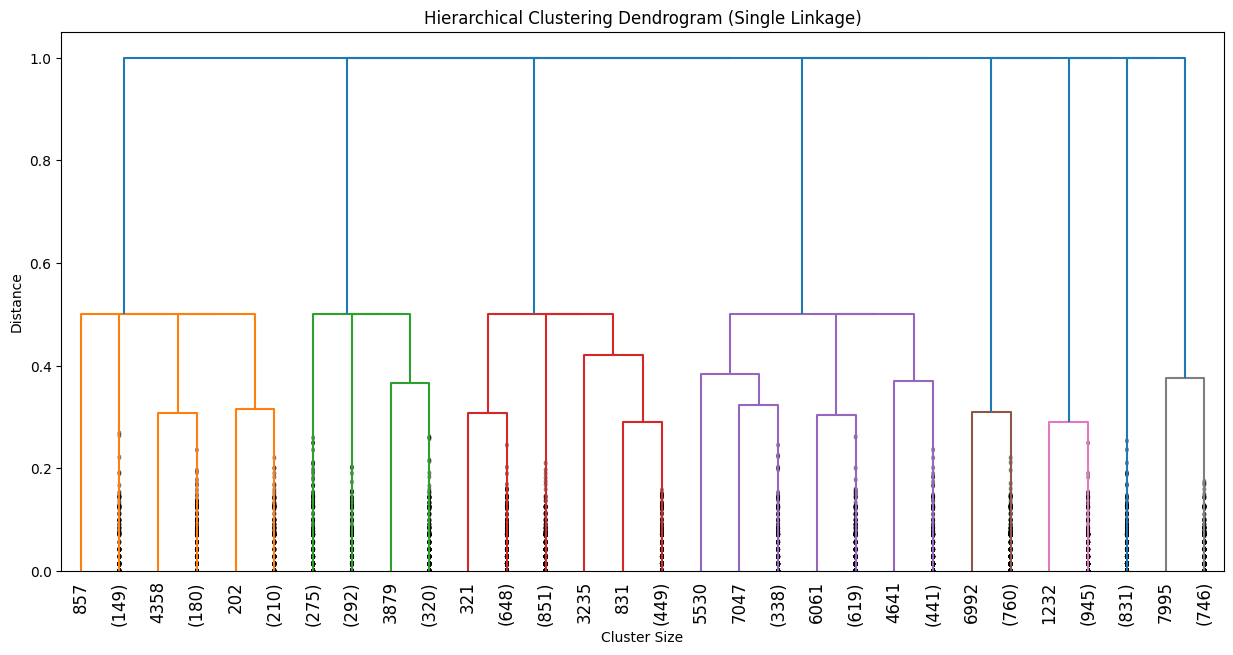

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Hierarchical clustering using the Single Linkage method
linked_single = linkage(scaled_features, method='single', metric='euclidean')

plt.figure(figsize=(15, 7))
dendrogram(linked_single, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()


In [10]:
linked_single[0]

array([  0., 968.,   0.,   2.])

linkage_outcome = $[id_1, id_2, distance, \# samples]$

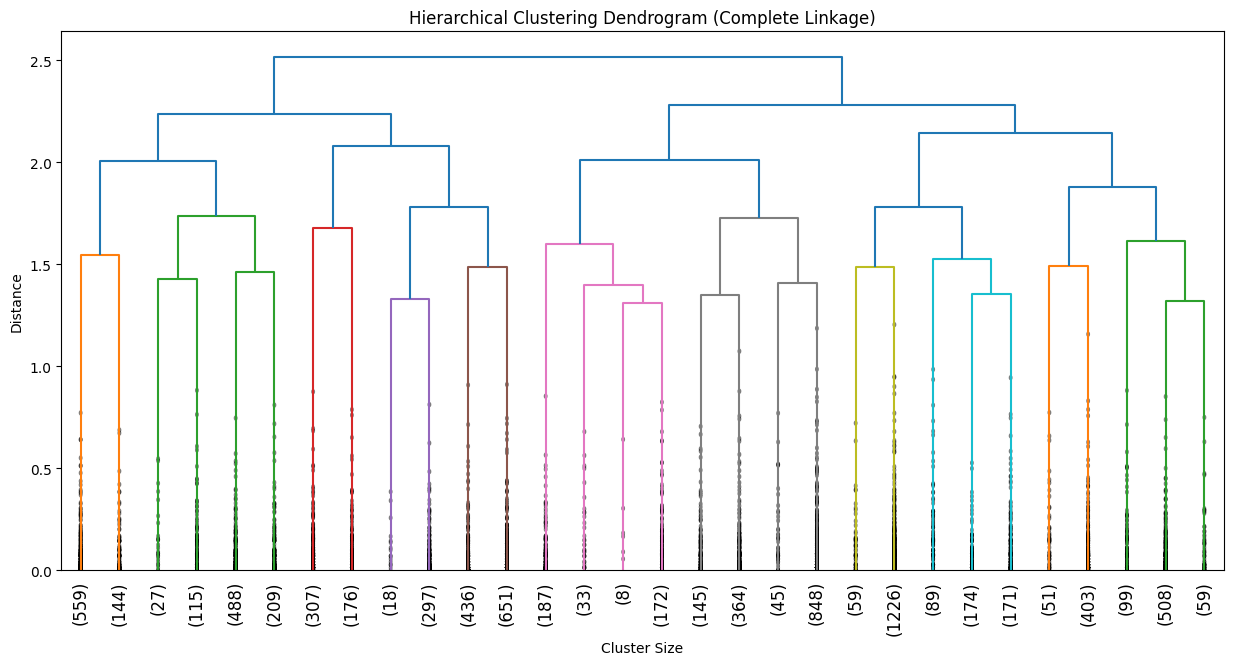

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Hierarchical clustering using the Single Linkage method
linked_complete = linkage(scaled_features, method='complete', metric='euclidean')

plt.figure(figsize=(15, 7))
dendrogram(linked_complete, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()


In [9]:
from sklearn.manifold import TSNE

# Applying t-SNE to reduce the data to two dimensions
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(scaled_features)

# Converting the t-SNE output to a DataFrame
tsne_df = pd.DataFrame(data_tsne, columns=['Dimension 1', 'Dimension 2'])

# Adding the original cluster labels to the t-SNE DataFrame
tsne_df['Original_Cluster'] = data['Cluster']

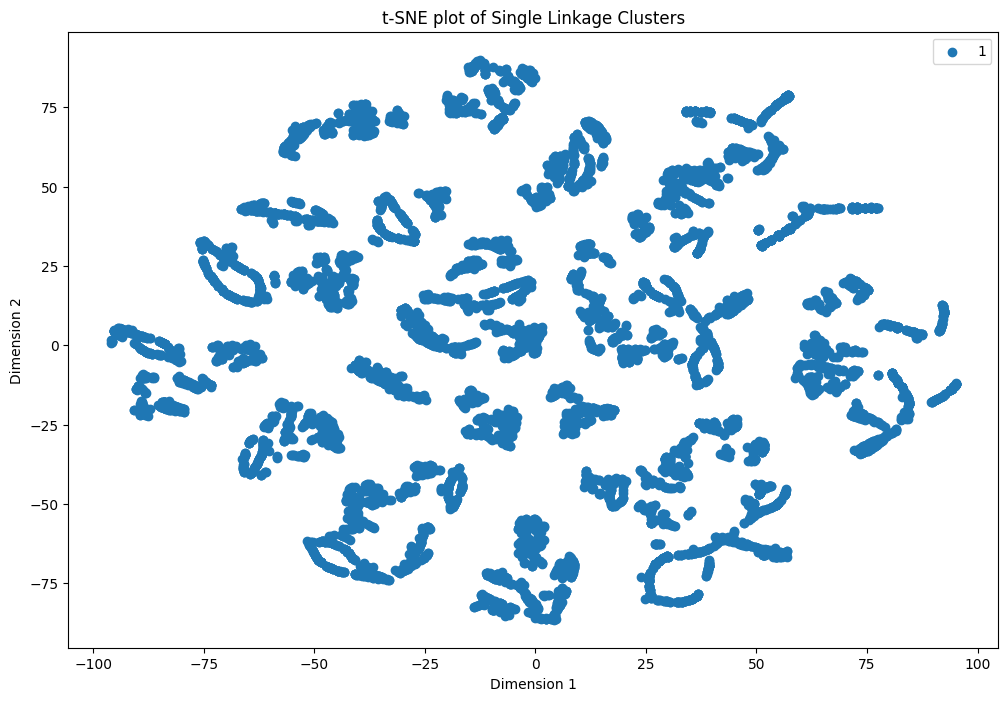

In [15]:
from scipy.cluster.hierarchy import fcluster

# Converting the t-SNE output to a DataFrame
tsne_df = pd.DataFrame(data_tsne, columns=['Dimension 1', 'Dimension 2'])

# Adding the original cluster labels to the t-SNE DataFrame
cluster_labels = fcluster(linked_single, t=2, criterion='maxclust')
tsne_df['Original_Cluster'] = cluster_labels

# Plotting the original clusters
plt.figure(figsize=(12, 8))
for cluster in tsne_df['Original_Cluster'].unique():
    subset = tsne_df[tsne_df['Original_Cluster'] == cluster]
    plt.scatter(subset['Dimension 1'], subset['Dimension 2'], label=cluster)
plt.title('t-SNE plot of Single Linkage Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

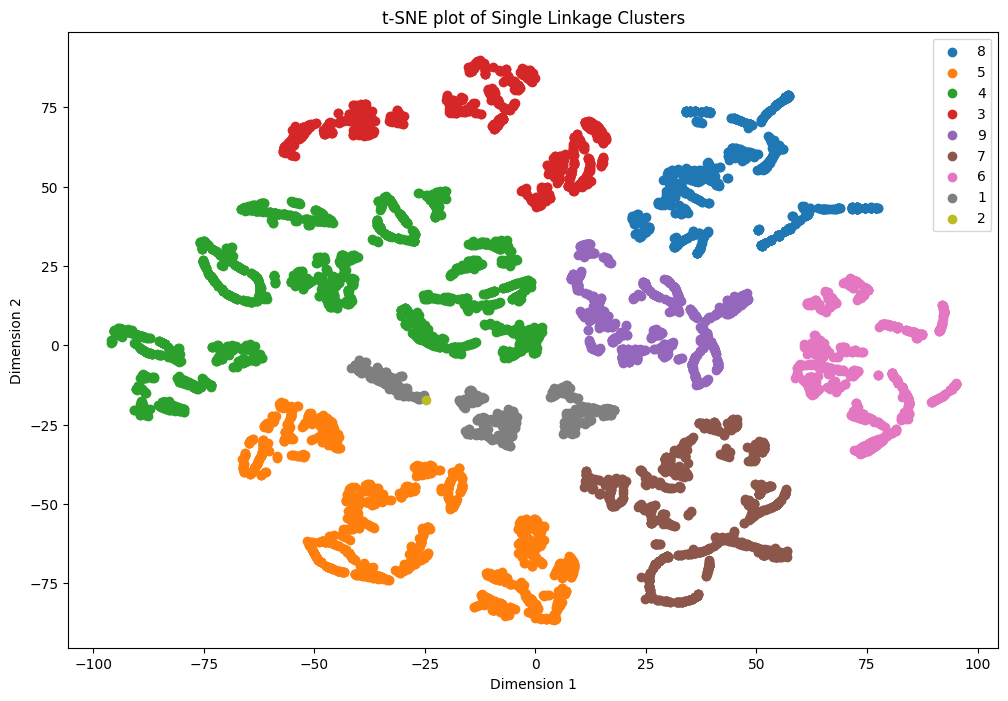

In [16]:
from scipy.cluster.hierarchy import fcluster

# Converting the t-SNE output to a DataFrame
tsne_df = pd.DataFrame(data_tsne, columns=['Dimension 1', 'Dimension 2'])

# Adding the original cluster labels to the t-SNE DataFrame
cluster_labels = fcluster(linked_single, t=12, criterion='maxclust')
tsne_df['Original_Cluster'] = cluster_labels

# Plotting the original clusters
plt.figure(figsize=(12, 8))
for cluster in tsne_df['Original_Cluster'].unique():
    subset = tsne_df[tsne_df['Original_Cluster'] == cluster]
    plt.scatter(subset['Dimension 1'], subset['Dimension 2'], label=cluster)
plt.title('t-SNE plot of Single Linkage Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

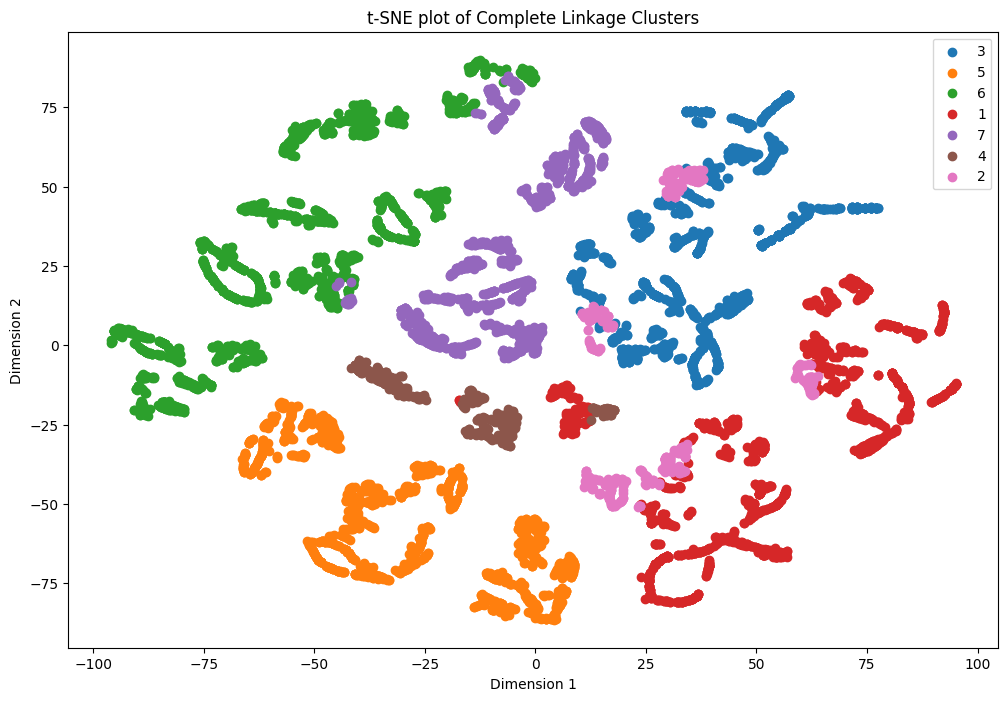

In [13]:

# Converting the t-SNE output to a DataFrame
tsne_df = pd.DataFrame(data_tsne, columns=['Dimension 1', 'Dimension 2'])

# Adding the original cluster labels to the t-SNE DataFrame
cluster_labels = fcluster(linked_complete, t=7, criterion='maxclust')
tsne_df['Original_Cluster'] = cluster_labels

# Plotting the original clusters
plt.figure(figsize=(12, 8))
for cluster in tsne_df['Original_Cluster'].unique():
    subset = tsne_df[tsne_df['Original_Cluster'] == cluster]
    plt.scatter(subset['Dimension 1'], subset['Dimension 2'], label=cluster)
plt.title('t-SNE plot of Complete Linkage Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

# K-means Clustering

In [16]:
from sklearn.cluster import KMeans

# Applying K-Means clustering for k=3, 5, 7
kmeans_3 = KMeans(n_clusters=3, random_state=42).fit(scaled_features)
kmeans_5 = KMeans(n_clusters=5, random_state=42).fit(scaled_features)
kmeans_7 = KMeans(n_clusters=7, random_state=42).fit(scaled_features)

# Assigning the cluster labels to the t-SNE DataFrame
tsne_df['KMeans_3'] = kmeans_3.labels_
tsne_df['KMeans_5'] = kmeans_5.labels_
tsne_df['KMeans_7'] = kmeans_7.labels_

tsne_df.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Dimension 1,Dimension 2,Original_Cluster,KMeans_3,KMeans_5,KMeans_7
0,-44.916561,68.539955,7,1,4,4
1,32.775745,-48.019211,4,0,3,6
2,3.584737,-68.258247,3,0,3,6
3,78.684761,38.330765,3,0,0,1
4,53.443844,-22.232922,6,0,3,6


In [18]:
# Accessing the centroids
centroids = kmeans_3.cluster_centers_

# Display the centroids
print(centroids)

[[-0.13134213  0.81737045  0.62108495  0.1953384  -0.42088954  0.59151638
  -0.05691172]
 [ 0.08700267 -1.12107432 -0.72816048 -0.38437141 -0.40067032 -0.73529987
   0.23701249]
 [ 0.1931965  -0.17460442 -0.35198788  0.16474314  1.82381031 -0.26110903
  -0.2696694 ]]


In [28]:
pd.DataFrame(centroids, columns=data.columns[1:-1])

,Gender,Ever_Married,Age,College,Work_Experience,Spending_Score,Family_Size
0,-0.131342,0.817370,0.621085,0.195338,-0.42089,0.591516,-0.056912
1,0.087003,-1.121074,-0.728160,-0.384371,-0.40067,-0.735300,0.237012
2,0.193197,-0.174604,-0.351988,0.164743,1.82381,-0.261109,-0.269669


In [27]:
pd.DataFrame(scaled_features, columns=data.columns[1:-1]).apply(lambda x: round(x, 3)).describe()

,Gender,Ever_Married,Age,College,Work_Experience,Spending_Score,Family_Size
count,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000
mean,0.000130,0.000014,0.000014,0.000146,0.000177,-0.000149,0.000133
std,1.000024,1.000361,1.000041,1.000028,0.999968,1.000177,1.000086
min,-0.909000,-1.207000,-1.524000,-1.292000,-0.757000,-0.737000,-1.238000
25%,-0.909000,-1.207000,-0.806000,-1.292000,-0.757000,-0.737000,-0.571000
50%,-0.909000,0.829000,-0.207000,0.774000,-0.451000,-0.737000,0.096000
75%,1.100000,0.829000,0.570000,0.774000,0.468000,0.612000,0.763000
max,1.100000,0.829000,2.725000,0.774000,3.530000,1.962000,4.097000


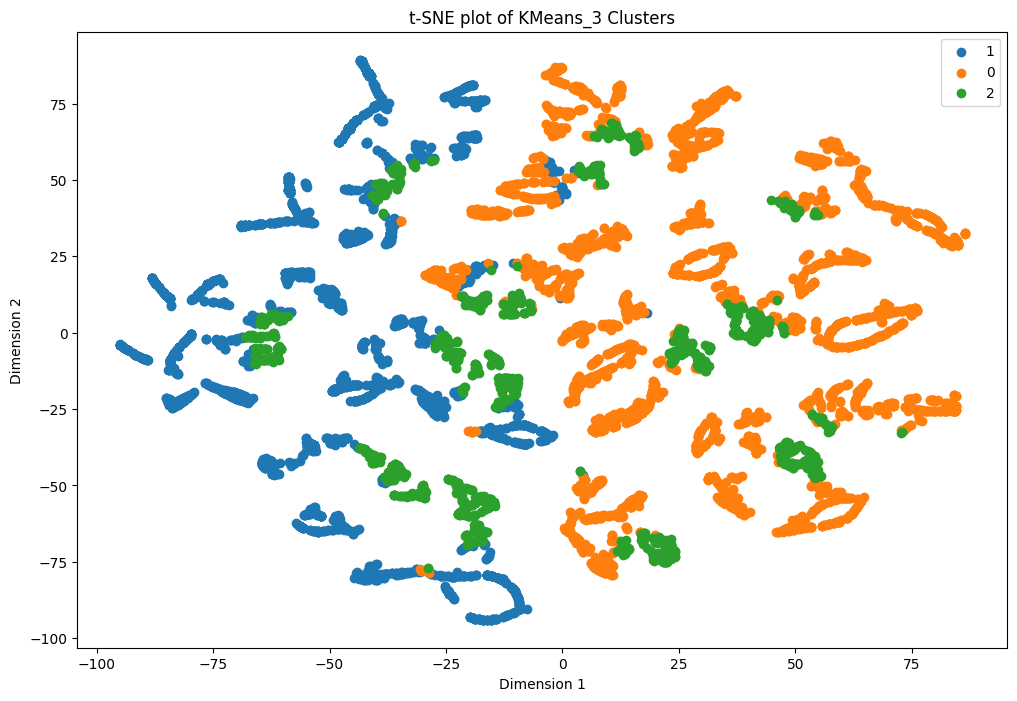

In [30]:

# Plotting the original clusters
plt.figure(figsize=(12, 8))
for cluster in tsne_df['KMeans_3'].unique():
    subset = tsne_df[tsne_df['KMeans_3'] == cluster]
    plt.scatter(subset['Dimension 1'], subset['Dimension 2'], label=cluster)
plt.title('t-SNE plot of KMeans_3 Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

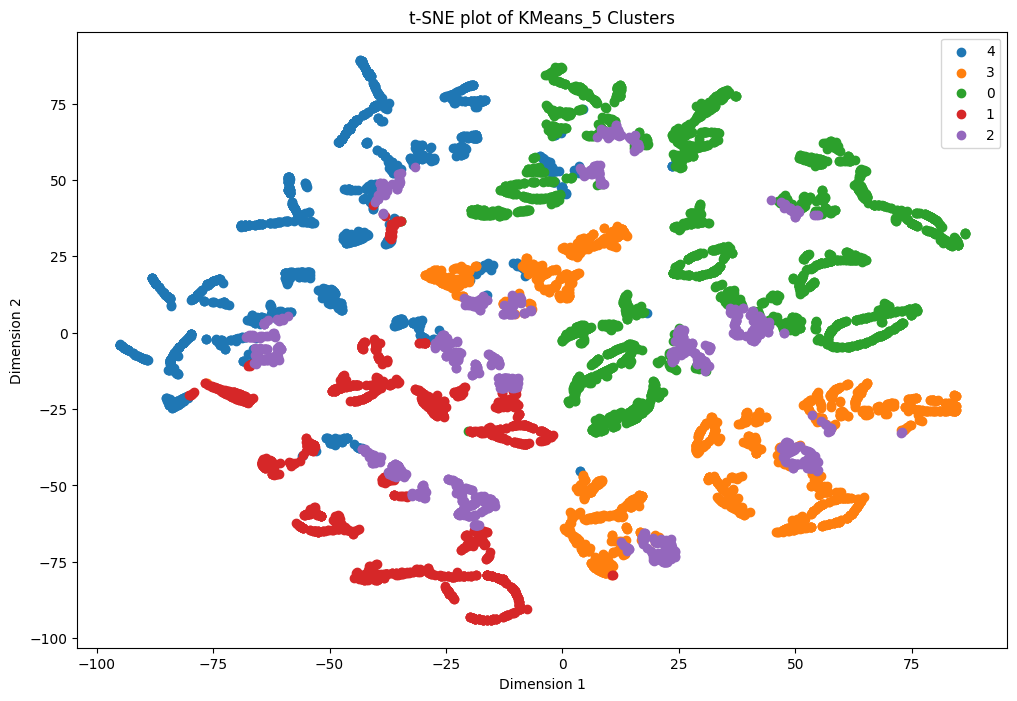

In [31]:

# Plotting the original clusters
plt.figure(figsize=(12, 8))
for cluster in tsne_df['KMeans_5'].unique():
    subset = tsne_df[tsne_df['KMeans_5'] == cluster]
    plt.scatter(subset['Dimension 1'], subset['Dimension 2'], label=cluster)
plt.title('t-SNE plot of KMeans_5 Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

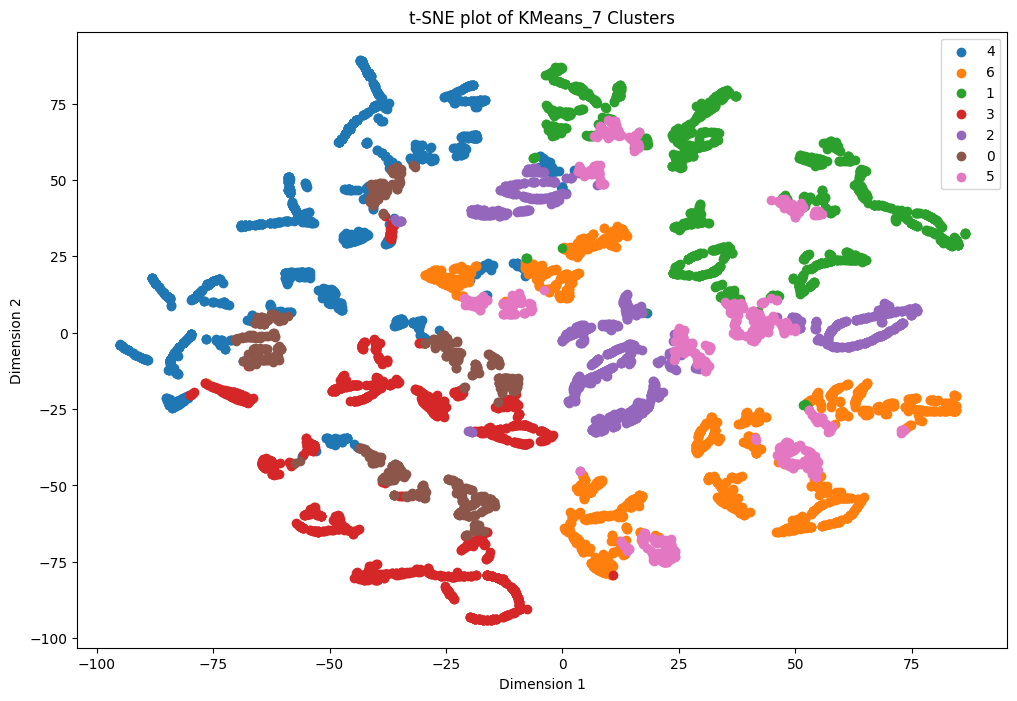

In [32]:

# Plotting the original clusters
plt.figure(figsize=(12, 8))
for cluster in tsne_df['KMeans_7'].unique():
    subset = tsne_df[tsne_df['KMeans_7'] == cluster]
    plt.scatter(subset['Dimension 1'], subset['Dimension 2'], label=cluster)
plt.title('t-SNE plot of KMeans_7 Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

# DBSCAN

In [33]:
from sklearn.cluster import DBSCAN
import pandas as pd

# Initialize DBSCAN with desired parameters
# eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other
# min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point
db = DBSCAN(eps=0.5, min_samples=5)

# Fit the model
db.fit(scaled_features)

# Extract cluster labels
labels = db.labels_

# Handling noise (-1 label is considered as noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')

Estimated number of clusters: 142
Estimated number of noise points: 848


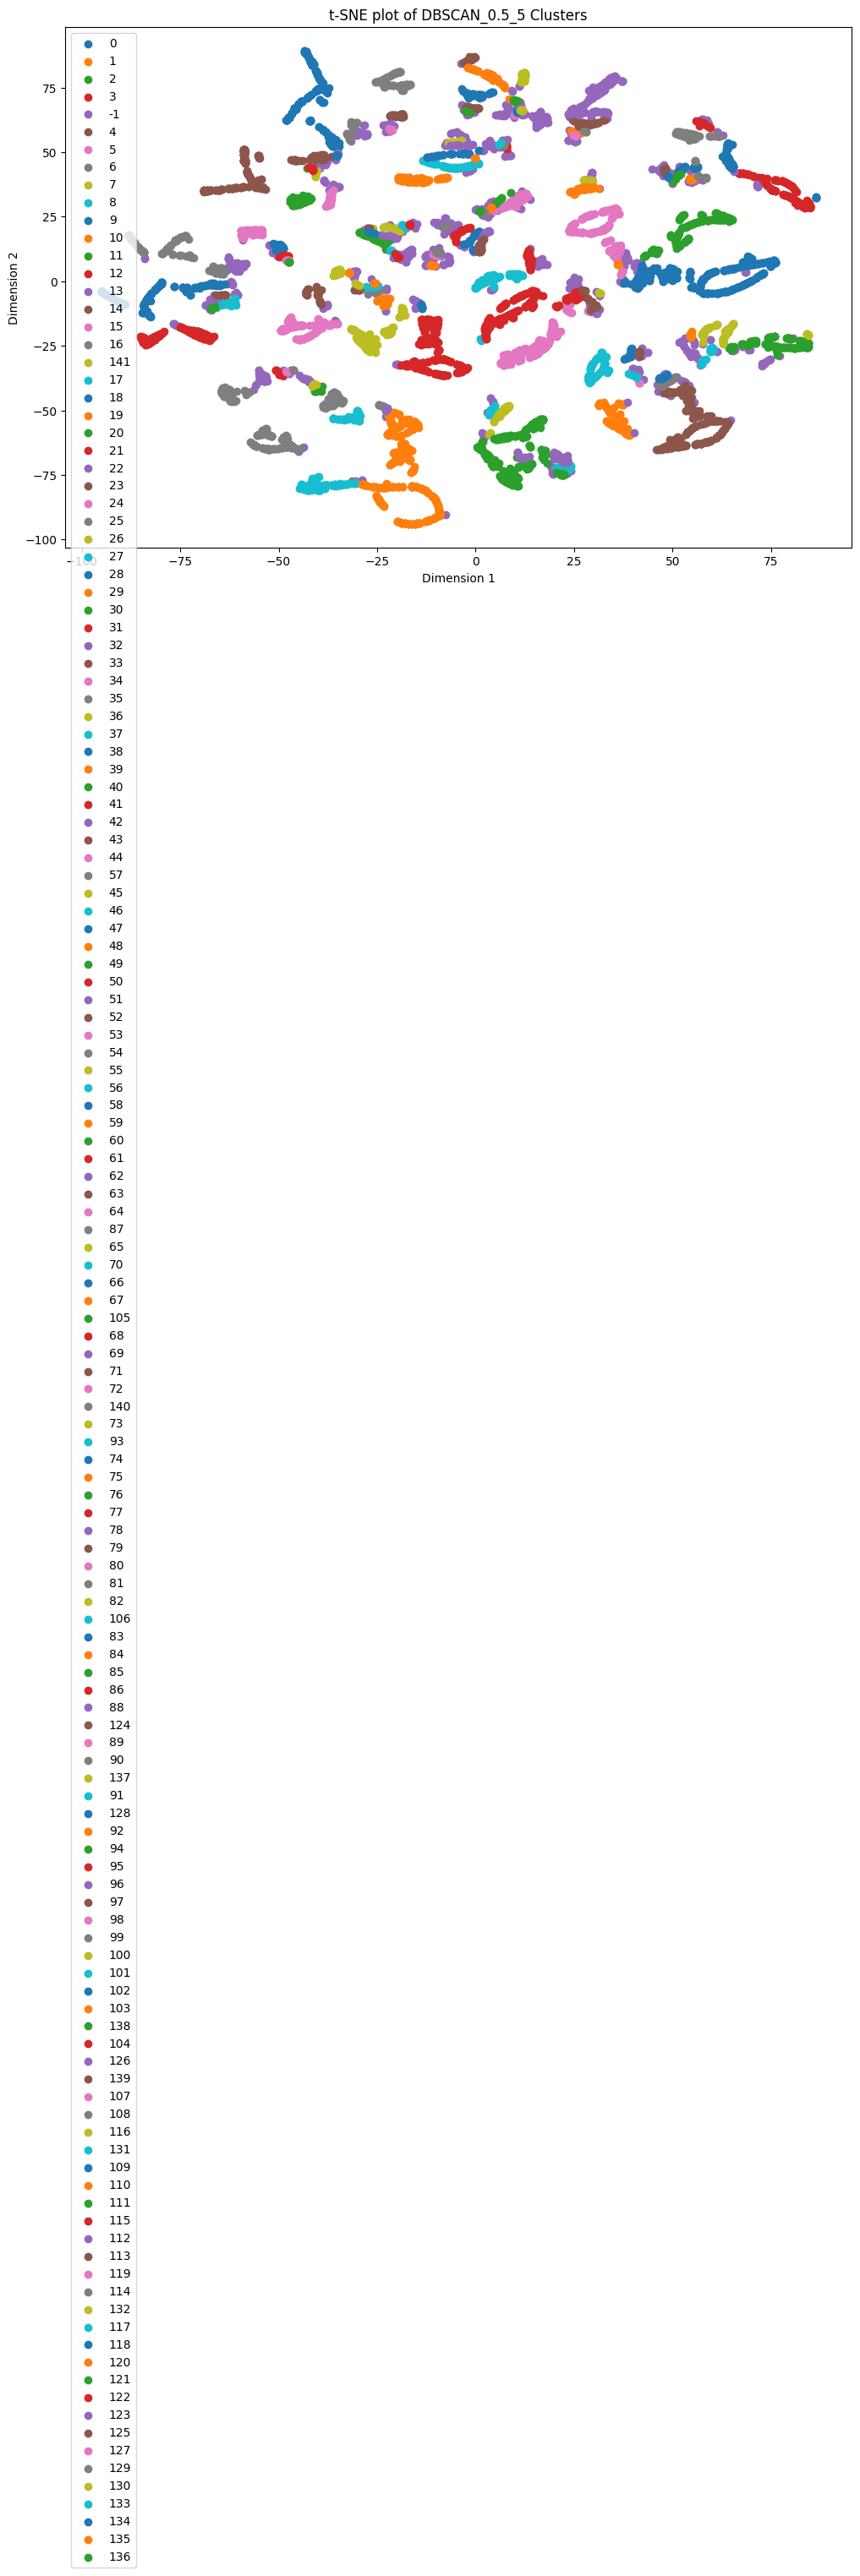

In [35]:
tsne_df['DBSCAN_5_5'] = db.labels_
# Plotting the original clusters
plt.figure(figsize=(12, 8))
for cluster in tsne_df['DBSCAN_5_5'].unique():
    subset = tsne_df[tsne_df['DBSCAN_5_5'] == cluster]
    plt.scatter(subset['Dimension 1'], subset['Dimension 2'], label=cluster)
plt.title('t-SNE plot of DBSCAN_0.5_5 Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [36]:
from sklearn.cluster import DBSCAN
import pandas as pd

# Initialize DBSCAN with desired parameters
# eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other
# min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point
db = DBSCAN(eps=5, min_samples=50)

# Fit the model
db.fit(scaled_features)

# Extract cluster labels
labels = db.labels_

# Handling noise (-1 label is considered as noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')

Estimated number of clusters: 1
Estimated number of noise points: 0


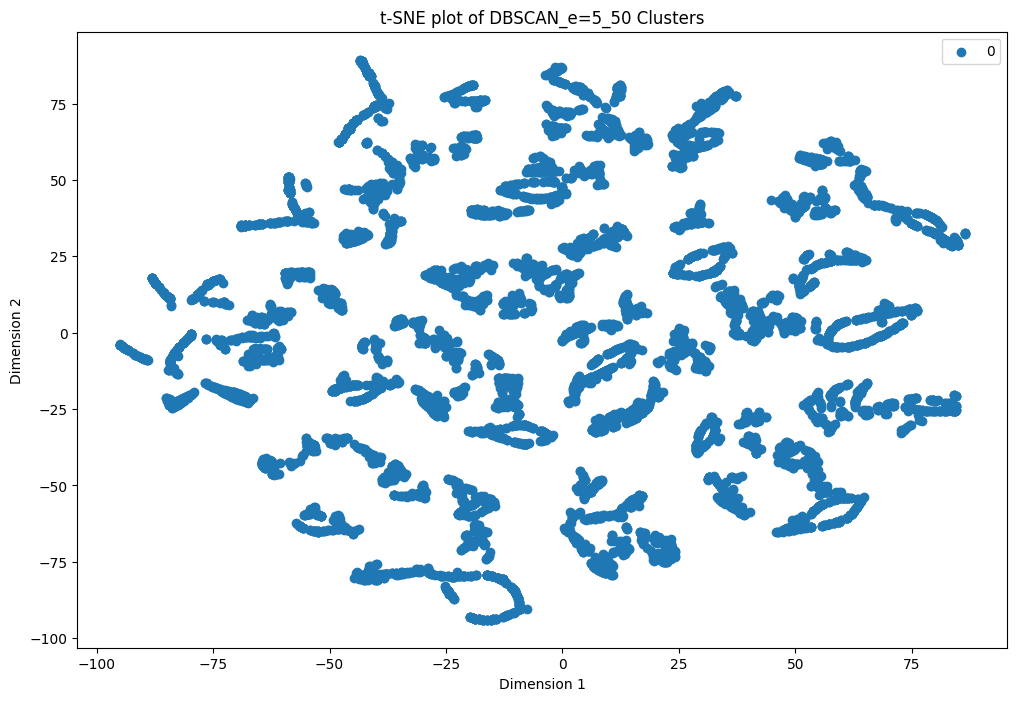

In [37]:
tsne_df['DBSCAN_5_50'] = db.labels_
# Plotting the original clusters
plt.figure(figsize=(12, 8))
for cluster in tsne_df['DBSCAN_5_50'].unique():
    subset = tsne_df[tsne_df['DBSCAN_5_50'] == cluster]
    plt.scatter(subset['Dimension 1'], subset['Dimension 2'], label=cluster)
plt.title('t-SNE plot of DBSCAN_e=5_50 Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [38]:
from sklearn.cluster import DBSCAN
import pandas as pd

# Initialize DBSCAN with desired parameters
# eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other
# min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point
db = DBSCAN(eps=1, min_samples=50)

# Fit the model
db.fit(scaled_features)

# Extract cluster labels
labels = db.labels_

# Handling noise (-1 label is considered as noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')

Estimated number of clusters: 16
Estimated number of noise points: 787


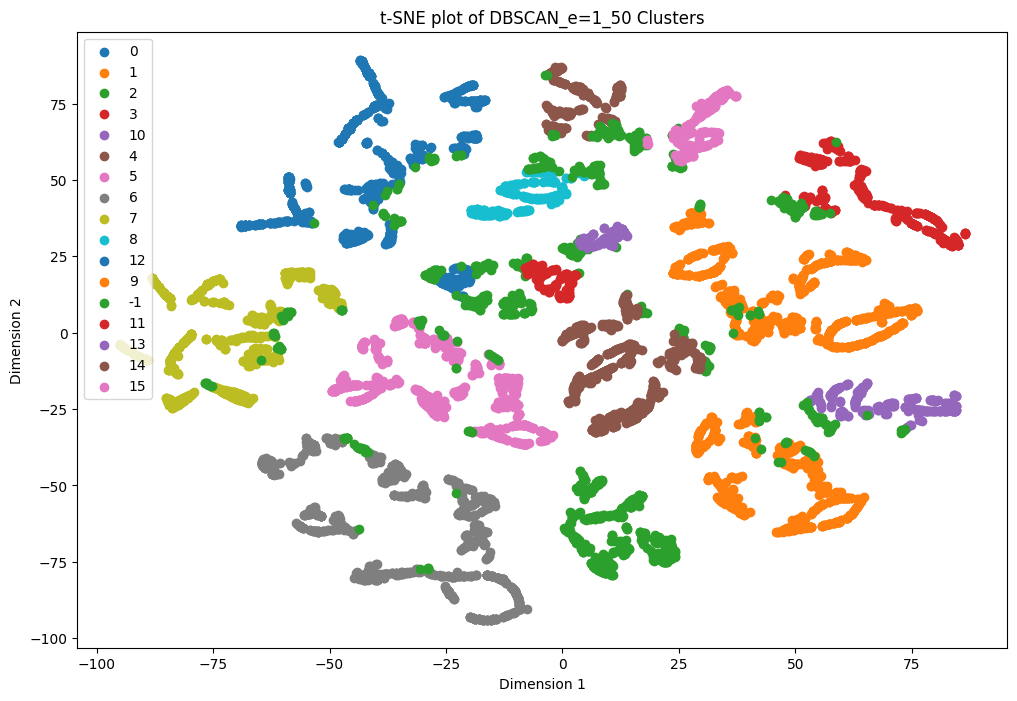

In [39]:
tsne_df['DBSCAN_1_50'] = db.labels_
# Plotting the original clusters
plt.figure(figsize=(12, 8))
for cluster in tsne_df['DBSCAN_1_50'].unique():
    subset = tsne_df[tsne_df['DBSCAN_1_50'] == cluster]
    plt.scatter(subset['Dimension 1'], subset['Dimension 2'], label=cluster)
plt.title('t-SNE plot of DBSCAN_e=1_50 Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

Estimated number of clusters: 8
Estimated number of noise points: 132


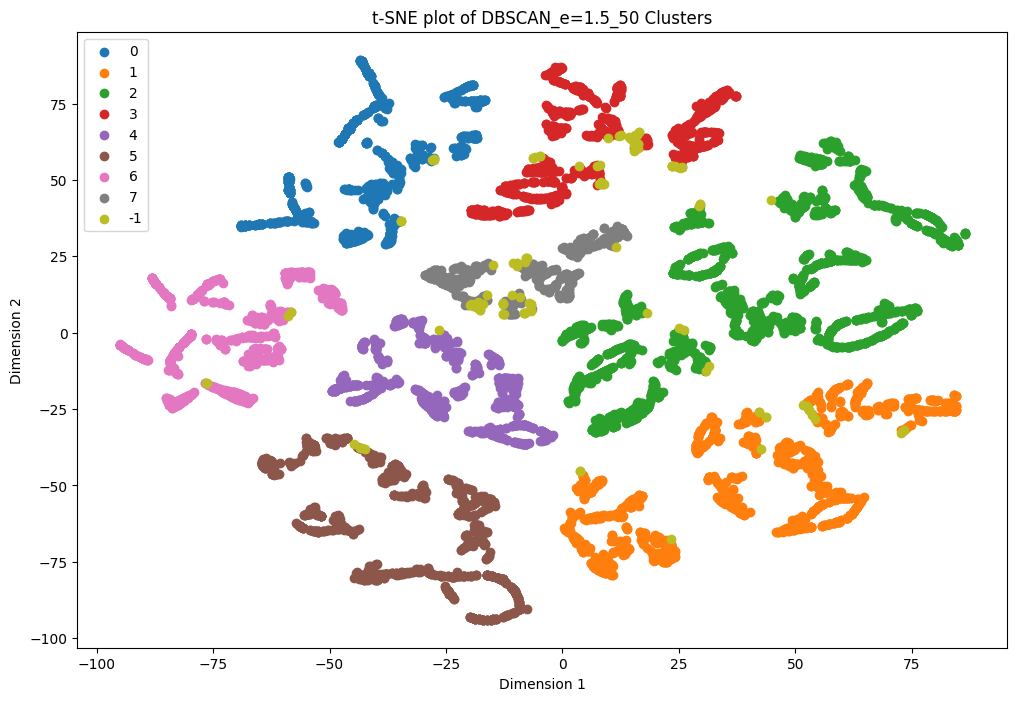

In [40]:
from sklearn.cluster import DBSCAN
import pandas as pd

# Initialize DBSCAN with desired parameters
# eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other
# min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point
db = DBSCAN(eps=1.5, min_samples=50)

# Fit the model
db.fit(scaled_features)

# Extract cluster labels
labels = db.labels_

# Handling noise (-1 label is considered as noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')

tsne_df['DBSCAN_15_50'] = db.labels_
# Plotting the original clusters
plt.figure(figsize=(12, 8))
for cluster in tsne_df['DBSCAN_15_50'].unique():
    subset = tsne_df[tsne_df['DBSCAN_15_50'] == cluster]
    plt.scatter(subset['Dimension 1'], subset['Dimension 2'], label=cluster)
plt.title('t-SNE plot of DBSCAN_e=1.5_50 Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

# Original Clusters

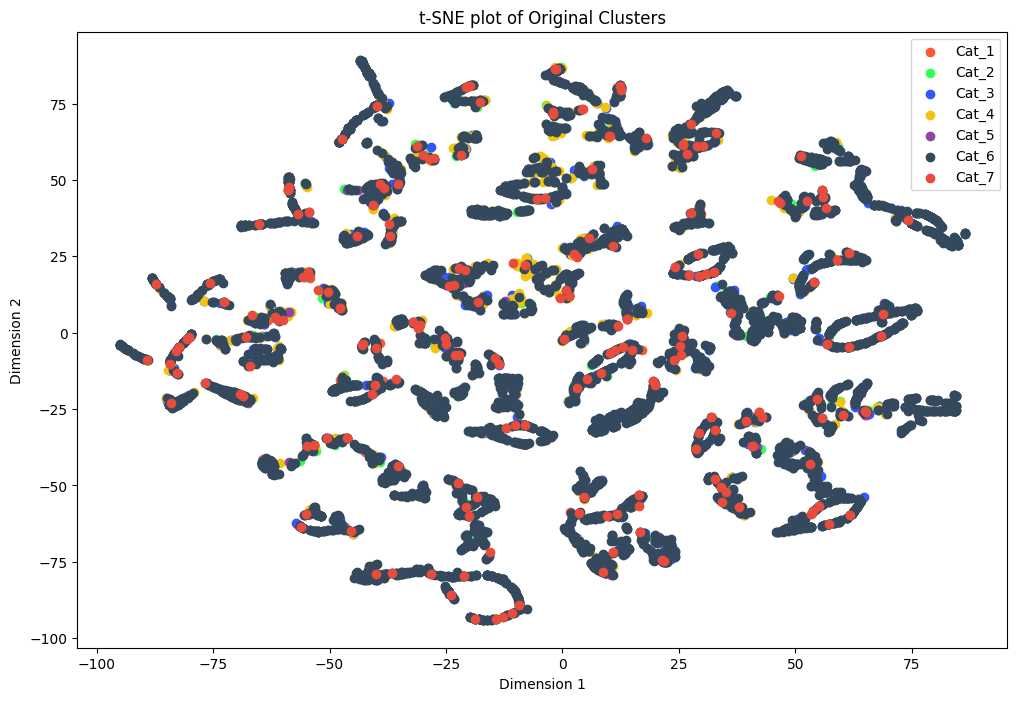

In [46]:
colors = ['#FF5733',  # Red
          '#33FF57',  # Green
          '#3357FF',  # Blue
          '#F1C40F',  # Yellow
          '#8E44AD',  # Purple
          '#34495E',  # Dark Blue
          '#E74C3C']  # Light Red

tsne_df['Original_Cluster'] = data['Cluster']
# Plotting the original clusters
plt.figure(figsize=(12, 8))
for i,cluster in enumerate(tsne_df['Original_Cluster'].sort_values().unique()):
    subset = tsne_df[tsne_df['Original_Cluster'] == cluster]
    plt.scatter(subset['Dimension 1'], subset['Dimension 2'], label=cluster, color=colors[i])
plt.title('t-SNE plot of Original Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()


# KNN
- back to supervised methods

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame
# Drop the 'ID' column
data = data.drop('ID', axis=1)

# Separate features and target
X = data.drop('Cluster', axis=1)  # Features
y = data['Cluster']  # Target

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the testing data
X_test = scaler.transform(X_test)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can choose a different number for n_neighbors

# Fit the classifier to the data
knn.fit(X_train, y_train)

from sklearn.metrics import classification_report, accuracy_score

# Predicting the Test set results
y_pred = knn.predict(X_test)

# Evaluating the Algorithm
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.5867410161090458
              precision    recall  f1-score   support

       Cat_1       0.00      0.00      0.00        28
       Cat_2       0.06      0.04      0.05        80
       Cat_3       0.18      0.10      0.13       169
       Cat_4       0.27      0.22      0.24       221
       Cat_5       0.00      0.00      0.00        18
       Cat_6       0.68      0.83      0.75      1053
       Cat_7       0.00      0.00      0.00        45

    accuracy                           0.59      1614
   macro avg       0.17      0.17      0.17      1614
weighted avg       0.50      0.59      0.54      1614



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predicting the Test set results
y_pred = knn.predict(X_test)

# Calculating the Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generating the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generating the Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)



Accuracy: 0.59
Confusion Matrix:
[[  0   4   4   1   0  19   0]
 [  0   3   5  10   0  62   0]
 [  0   5  17  19   0 128   0]
 [  0   7  15  48   1 150   0]
 [  0   1   1   4   0  12   0]
 [  2  29  54  89   0 879   0]
 [  0   1   1   6   0  37   0]]
Classification Report:
              precision    recall  f1-score   support

       Cat_1       0.00      0.00      0.00        28
       Cat_2       0.06      0.04      0.05        80
       Cat_3       0.18      0.10      0.13       169
       Cat_4       0.27      0.22      0.24       221
       Cat_5       0.00      0.00      0.00        18
       Cat_6       0.68      0.83      0.75      1053
       Cat_7       0.00      0.00      0.00        45

    accuracy                           0.59      1614
   macro avg       0.17      0.17      0.17      1614
weighted avg       0.50      0.59      0.54      1614



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-36-79ee0532b043>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'k': k, 'Accuracy': accuracy, 'Precision': precision,
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-36-79ee0532b043>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'k': k, 'Accuracy': accuracy, 'Precision': precision,
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

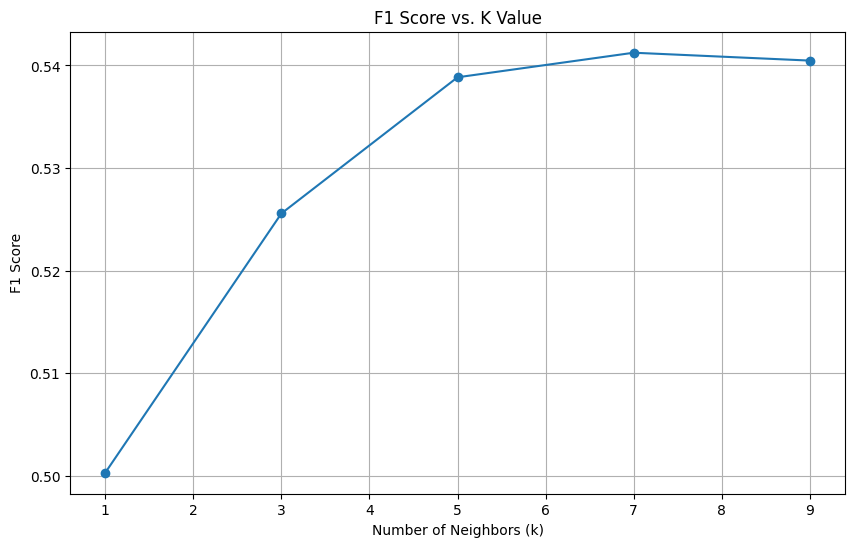

In [36]:

import pandas as pd

# DataFrame to store metrics for each k
metrics_df = pd.DataFrame(columns=['k', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

for k in range(1, 10, 2):  # Looping from k=1 to k=9
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append to DataFrame
    metrics_df = metrics_df.append({'k': k, 'Accuracy': accuracy, 'Precision': precision,
                                    'Recall': recall, 'F1_Score': f1}, ignore_index=True)


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(metrics_df['k'], metrics_df['F1_Score'], marker='o')
plt.title('F1 Score vs. K Value')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('F1 Score')
plt.xticks(range(1, 10))
plt.grid(True)
plt.show()


f1: 0.6947258015239638


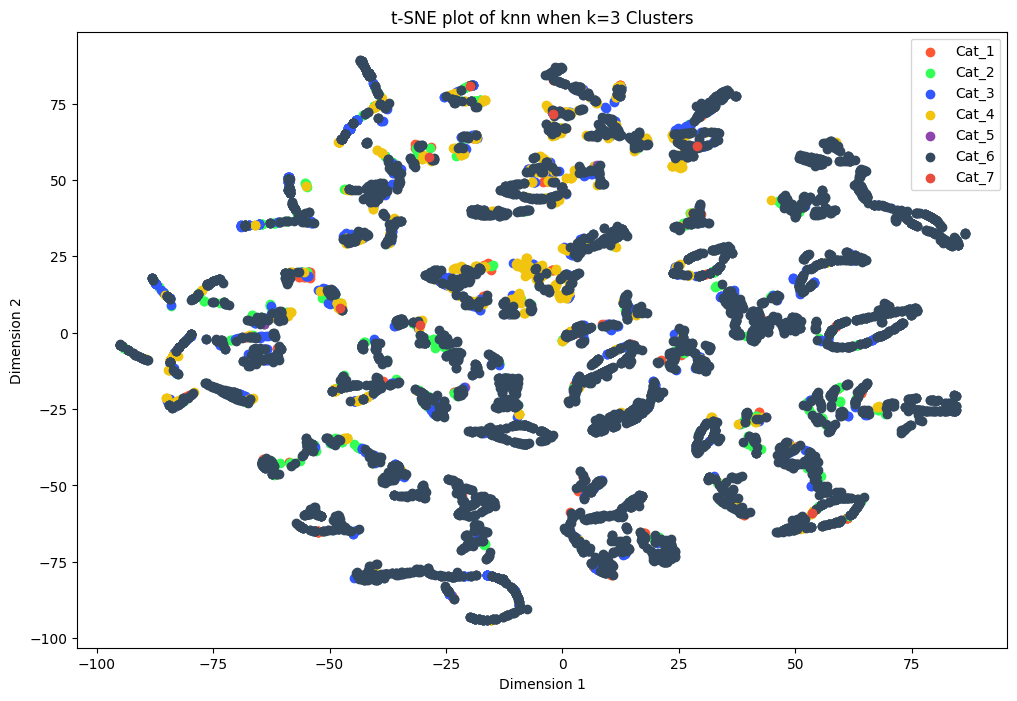

In [44]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
tsne_df['knn_k3'] = knn.predict(scaled_features)

colors = ['#FF5733',  # Red
          '#33FF57',  # Green
          '#3357FF',  # Blue
          '#F1C40F',  # Yellow
          '#8E44AD',  # Purple
          '#34495E',  # Dark Blue
          '#E74C3C']  # Light Red


print('f1:',f1_score(y_train, knn.predict(X_train), average='weighted'))
# Plotting the original clusters
plt.figure(figsize=(12, 8))
for i, cluster in enumerate(tsne_df['knn_k3'].sort_values().unique()):
    subset = tsne_df[tsne_df['knn_k3'] == cluster]
    plt.scatter(subset['Dimension 1'], subset['Dimension 2'], label=cluster, color=colors[i])
plt.title('t-SNE plot of knn when k=3 Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()